### 다항Ploynomail 회귀
+ 데이터가 단순한 직선의 형태가 아닌 비선형 형태여도 선형모델을 사용해서 비선형 모델을 학습할 수도 있음
+ 이대 각 특성을 거듭제곱으로 새로운 특성을 추가하고 확장된 특성을 포함한 데이터셋으로 선형모델을 학습시킴
+ 이렇게 학습시키는 방식을 다항회귀라 함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

+ $ 0.5x^2 + x + 2 \epsilon $ 함수로 만든 데이터 시각화

In [2]:
np.random.seed(2111081605)
m = 100
X = 6 * np.random.rand(m) - 3
y= 0.5 * (X **2) + X + 2 + np.random.rand(m)

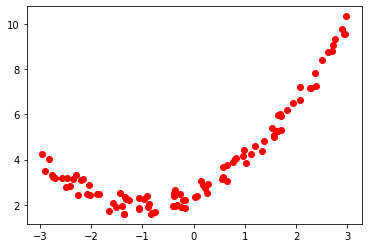

In [3]:
plt.plot(X,y,'ro')

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X.reshape(-1,1), y, train_size=0.7, random_state=2111081615)
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)
print(lrclf.coef_, '%.2f' % lrclf.intercept_)

[1.04152488] 4.08


In [5]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

1.33 0.60


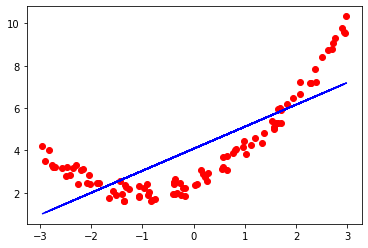

In [6]:
a = lrclf.coef_
b = lrclf.intercept_
z = [((a*x)+b) for x in X]
plt.plot(X,y,'ro')
plt.plot(X,z,'b--')

In [7]:
# 비선형 형태의 데이터들을 다항회귀로 풀어봄
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures(차수,옵션)
pf = PolynomialFeatures(degree=2, include_bias=False) # 차수 degree는 2차, include_bias=False 상수 제거

X_poly = pf.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
lr.fit(X_poly, y)

print(lr.coef_, '%.2f' % lr.intercept_) 
# y = 0.5x^2 + 1.02x + 2.51

[1.01652597 0.50137738] 2.51


In [8]:
pf.get_feature_names_out()   # 1 : 상수, x0 : 1차함수, x0^2 : 2차함수

array(['x0', 'x0^2'], dtype=object)

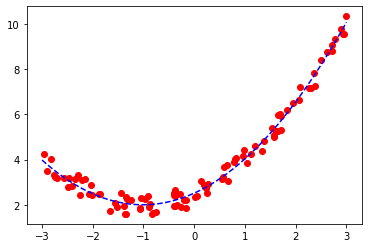

In [9]:
# 새롭게 만들어진 다항식으로 시각화
X_new = np.linspace(-3, 3, 100).reshape(-1,1)
X_new_poly = pf.transform(X_new)
pred = lr.predict(X_new_poly)

plt.plot(X, y, 'ro')
plt.plot(X_new, pred, 'b--')

In [10]:
np.sqrt(mean_squared_error(y,pred))

3.083613944996927

In [11]:
r2_score(y,pred)

-0.8623647438266755

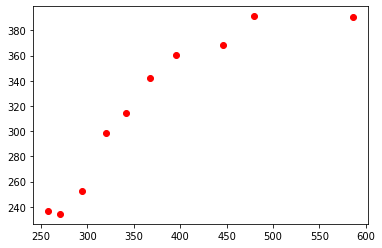

In [12]:
# 데이터가 다음과 같이 주어졌을때 다항회귀로 모델을 작성하고 다항식을 출력하세요.

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).reshape(-1,1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

plt.plot(X,y,'ro')

In [13]:
lrclf = LinearRegression()
lrclf.fit(X,y)
lrclf.coef_, lrclf.intercept_

(array([0.54030439]), 115.78555030272872)

In [14]:
z = lrclf.predict(X)

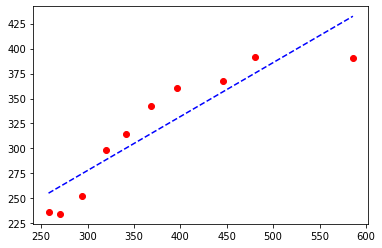

In [15]:
# 선형모델 시각화
plt.plot(X, y, 'ro')
plt.plot(X, z, 'b--')

In [16]:
rmse = np.sqrt(mean_squared_error(y, z))
r2 = r2_score(y, z)
print('%.2f' % rmse, '%.2f' % r2)

23.87 0.83


In [17]:
# 다항회귀모델 생성
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

plr = LinearRegression()
plr.fit(X_poly, y)

np.set_printoptions(precision=3, suppress=True)
plr.coef_,2, plr.intercept_,2

(array([ 2.399, -0.002]), 2, -243.22877740016133, 2)

In [18]:
z = plr.predict(X_poly)

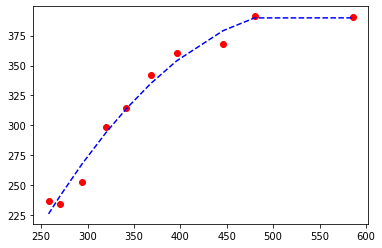

In [19]:
# 선형모델 시각화
plt.plot(X, y, 'ro')
plt.plot(X, z, 'b--')

In [20]:
rmse = np.sqrt(mean_squared_error(y, z))
r2 = r2_score(y, z)
print('%.2f' % rmse, '%.2f' % r2)

7.83 0.98
